### Importing Libraries and Data Set

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('dataSets/framingham.csv')

In [3]:
df.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Analyzing Data Set

In [4]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [6]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
# Checking Skew to choose between Median and Mean
# Skew > 1 or < -1 → strong skew → prefer median
# Skew near 0 → symmetric → mean is fine
for col in df.columns:
    if df[col].isna().sum() > 0:
        print(f"{col}: {df[col].skew()}")

education: 0.690032505819602
cigsPerDay: 1.247909902517148
BPMeds: 5.550010208855299
totChol: 0.8714220097202442
BMI: 0.9819743063688907
heartRate: 0.644481733525319
glucose: 6.213401853788979


In [8]:
# Based on the number of missing values and their importance, we will either fill or drop
df.drop(columns='education', inplace=True) # Education seems irrelevant?
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].median()) # Important column. More than one, so we want to use median
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mode()[0]) # Important column. It is either 0 or 1 (nominal) so we will use most frequent
df['totChol'] = df['totChol'].fillna(df['totChol'].median()) # Important column. Closer to 1, let's use median
df['BMI'] = df['BMI'].fillna(df['BMI'].median()) # Important column. Closer to 1, let's use median
df.dropna(subset=['heartRate'], inplace=True) # Just one. Let's just drop it.
df['glucose'] = df['glucose'].fillna(df['glucose'].median()) # Important column. More than one, so we want to use median

In [9]:
df.isna().sum() # Looks good, let's move on

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [10]:
df[df.duplicated()] # Checking for duplicates. None found, let's move on

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [11]:
# Checking for mixed values
# None found, let's move on

mixed_cols = []

for col in df.columns:
    types = df[col].map(type).nunique()
    if types > 1:
        mixed_cols.append(col)

print(mixed_cols)

[]


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

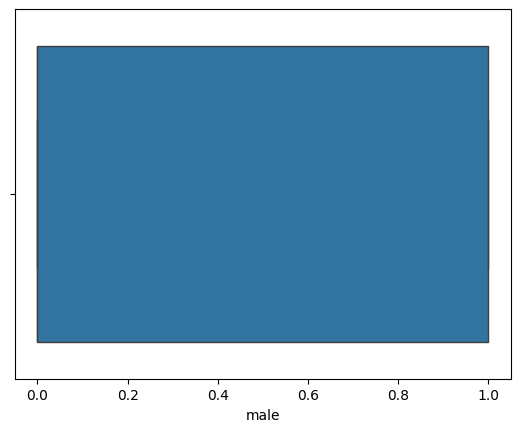

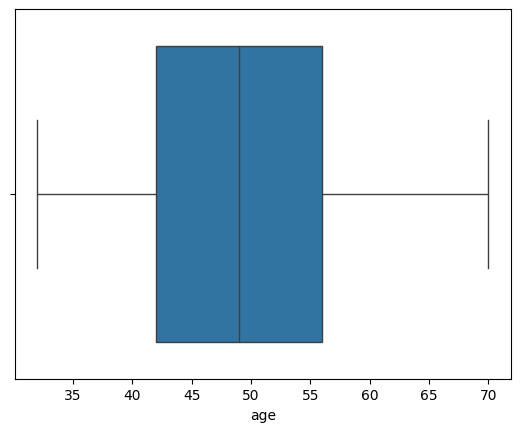

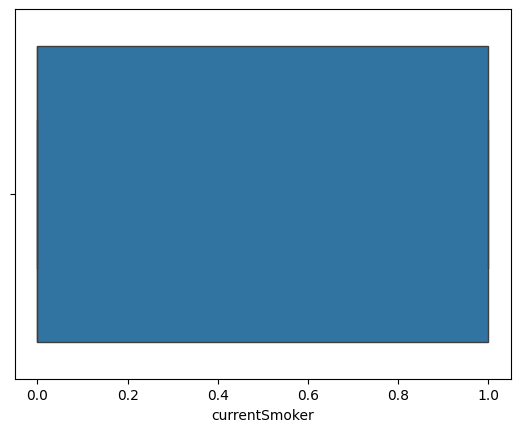

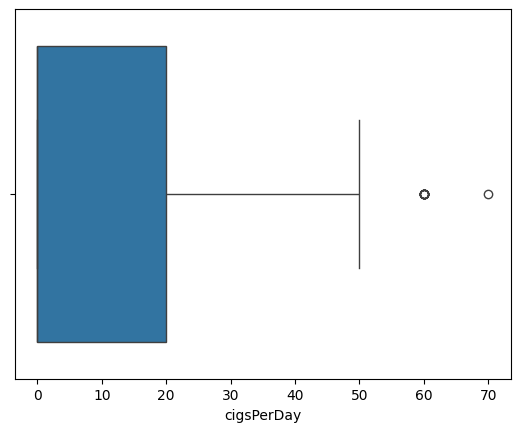

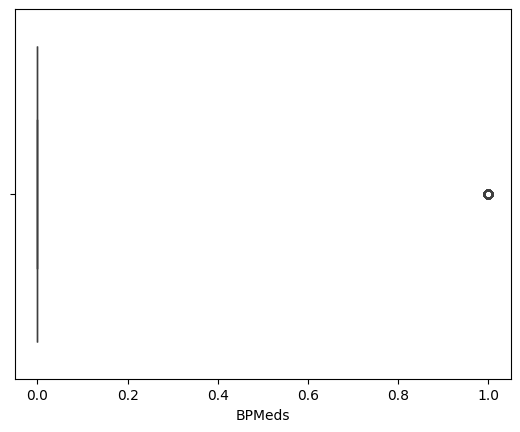

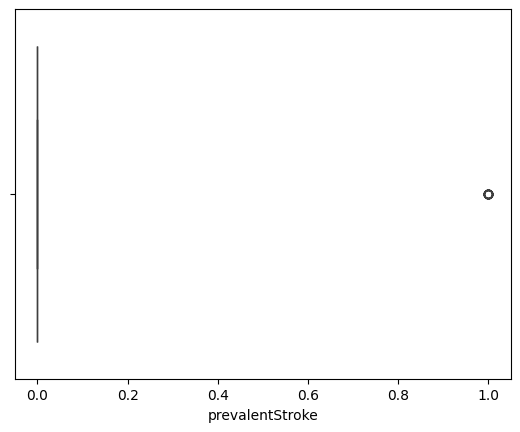

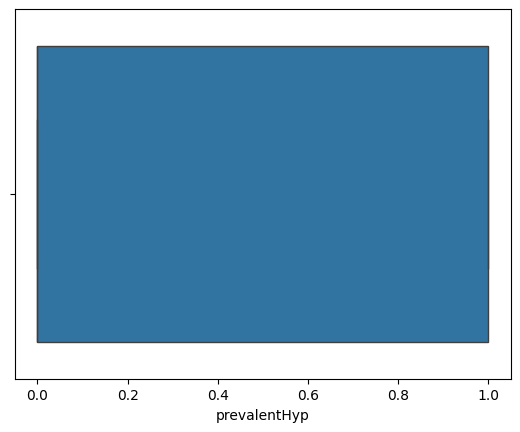

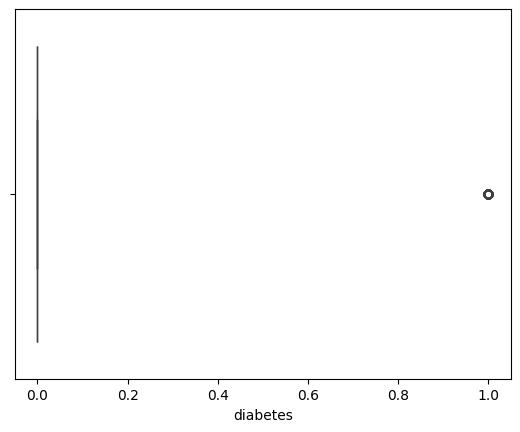

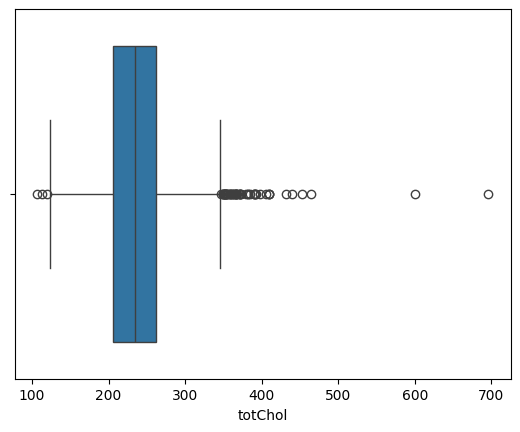

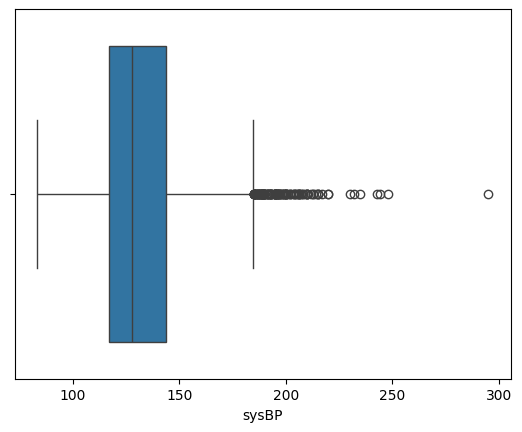

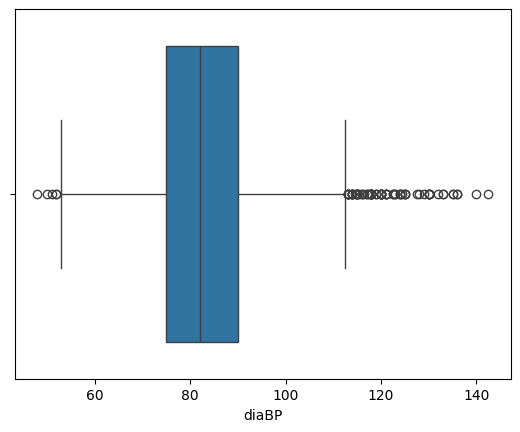

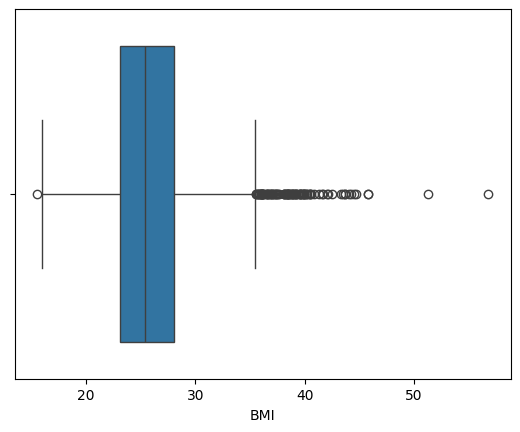

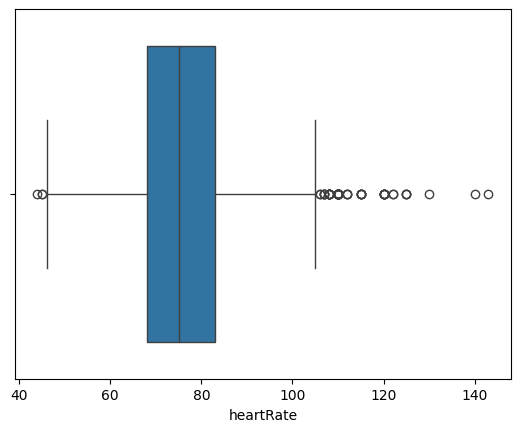

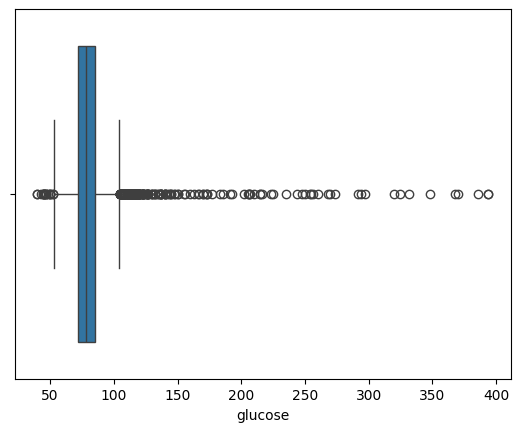

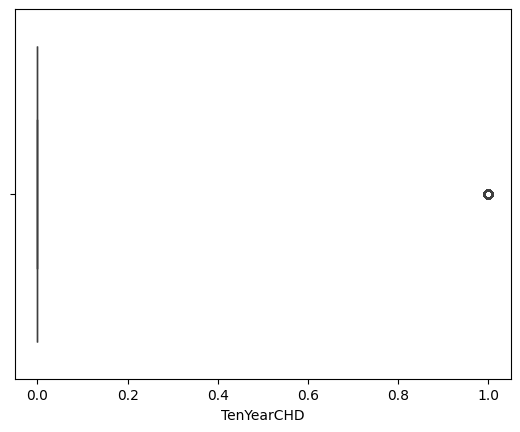

In [13]:
for col in df.columns:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.show()

In [14]:
def cap_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

# List of continuous columns with outliers
outlier_cols = ['totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

for col in outlier_cols:
    df = cap_outliers_iqr(df, col)


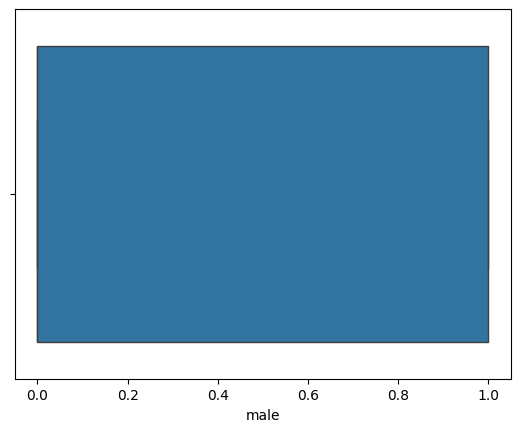

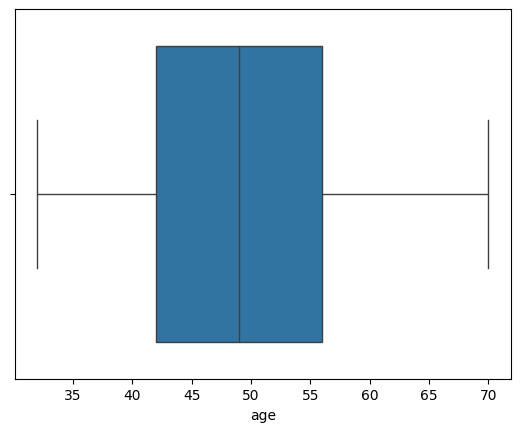

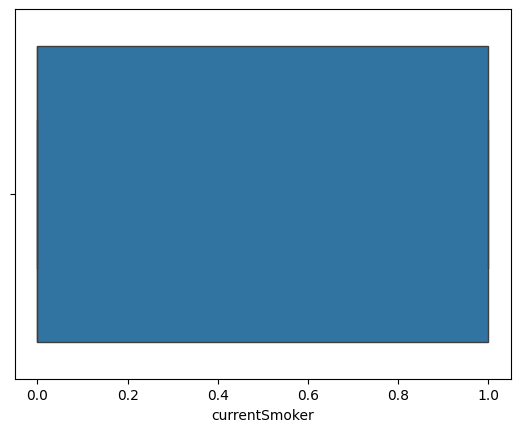

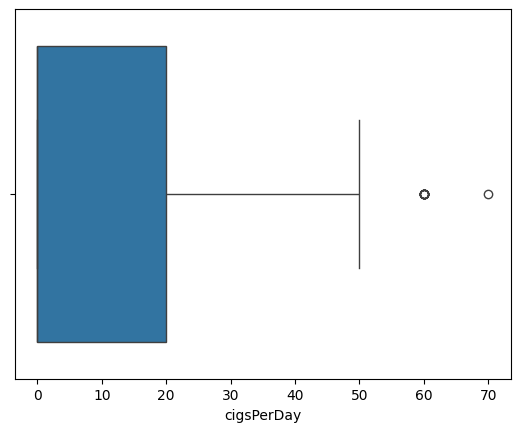

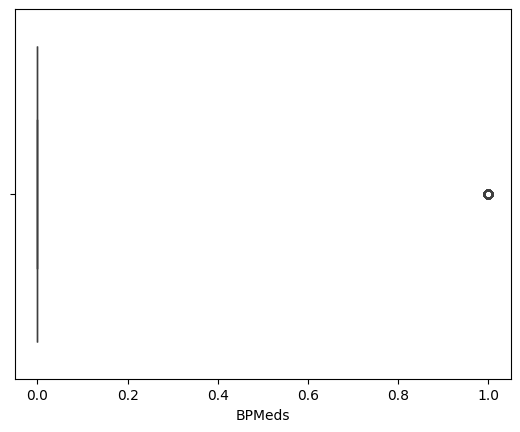

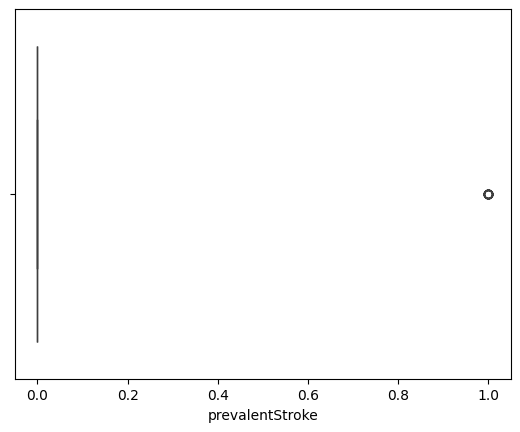

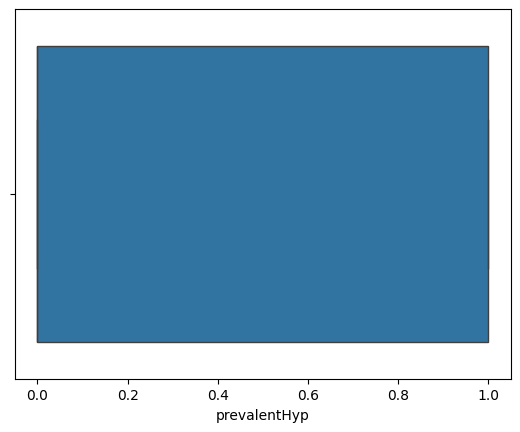

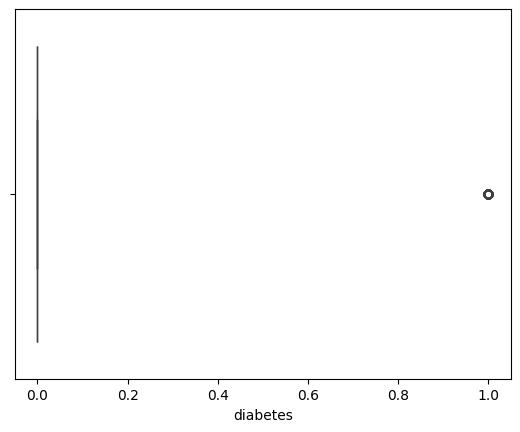

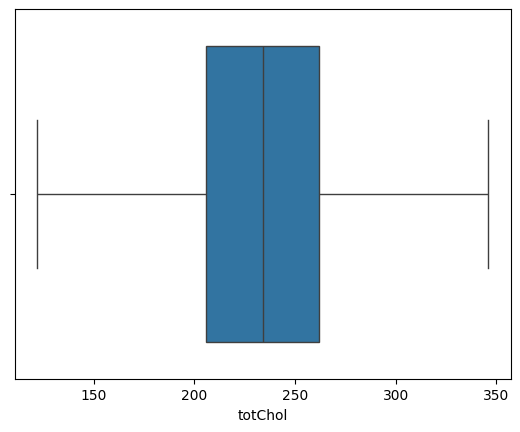

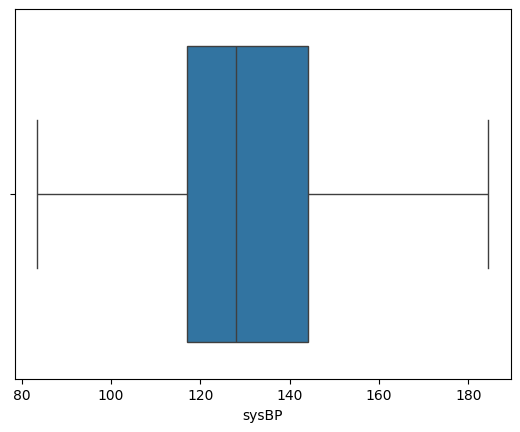

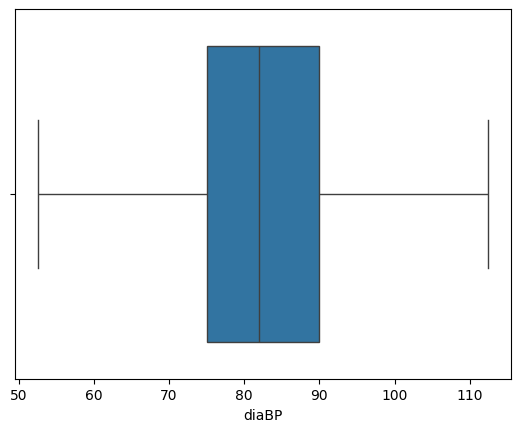

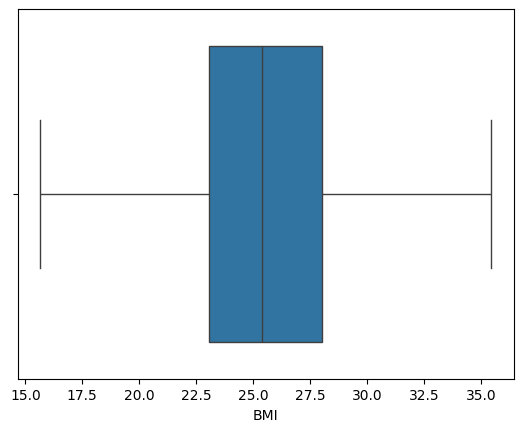

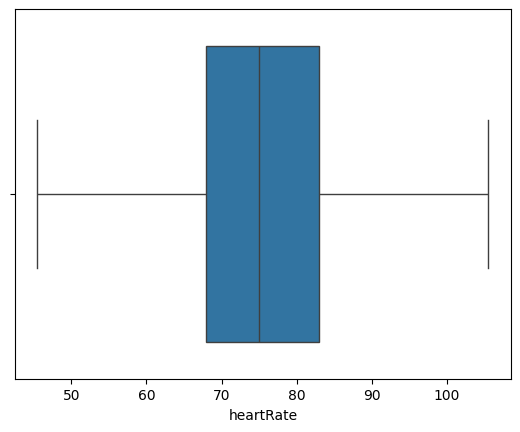

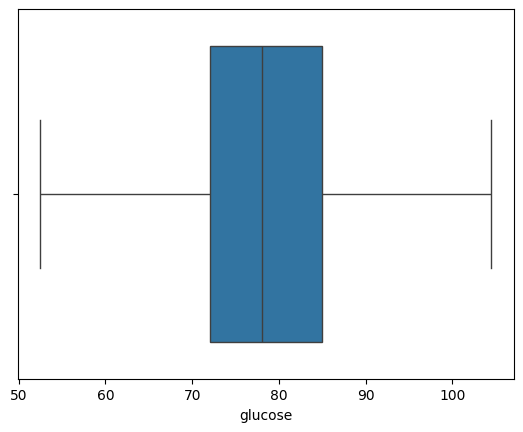

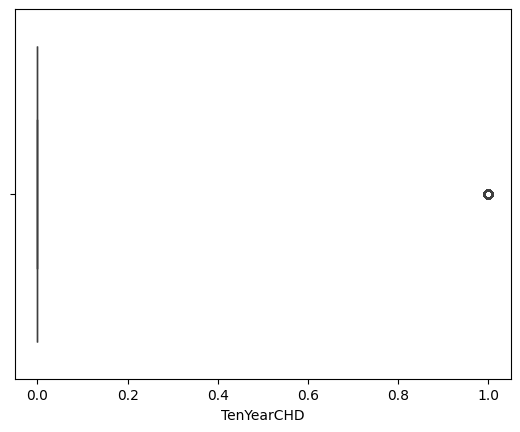

In [15]:
for col in df.columns:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.show()

### Logistic Regression

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4237 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4237 non-null   int64  
 1   age              4237 non-null   int64  
 2   currentSmoker    4237 non-null   int64  
 3   cigsPerDay       4237 non-null   float64
 4   BPMeds           4237 non-null   float64
 5   prevalentStroke  4237 non-null   int64  
 6   prevalentHyp     4237 non-null   int64  
 7   diabetes         4237 non-null   int64  
 8   totChol          4237 non-null   float64
 9   sysBP            4237 non-null   float64
 10  diaBP            4237 non-null   float64
 11  BMI              4237 non-null   float64
 12  heartRate        4237 non-null   float64
 13  glucose          4237 non-null   float64
 14  TenYearCHD       4237 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 529.6 KB


In [17]:
target = 'TenYearCHD'
X = df.drop(columns=[target])
y = df[target]

print("Columns in X:", X.columns.tolist())  # Should NOT contain 'TenYearCHD'

numericalFeatures = X.select_dtypes(include='number').columns.tolist()
categoricalFeatures = X.select_dtypes(include='category').columns.tolist()

print("Numerical features:", numericalFeatures)
print("Categorical features:", categoricalFeatures)


Columns in X: ['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
Numerical features: ['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
Categorical features: []


### Transforming nominal numerical to categories

In [18]:
for col in df.columns:
    if df[col].nunique() == 2:
        df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4237 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   male             4237 non-null   category
 1   age              4237 non-null   int64   
 2   currentSmoker    4237 non-null   category
 3   cigsPerDay       4237 non-null   float64 
 4   BPMeds           4237 non-null   category
 5   prevalentStroke  4237 non-null   category
 6   prevalentHyp     4237 non-null   category
 7   diabetes         4237 non-null   category
 8   totChol          4237 non-null   float64 
 9   sysBP            4237 non-null   float64 
 10  diaBP            4237 non-null   float64 
 11  BMI              4237 non-null   float64 
 12  heartRate        4237 non-null   float64 
 13  glucose          4237 non-null   float64 
 14  TenYearCHD       4237 non-null   category
dtypes: category(7), float64(7), int64(1)
memory usage: 327.7 KB


### Relationships

In [19]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'e:\projects\machine-learning\Logistic Regression\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [20]:
from phik import phik_matrix

interval columns not set, guessing: ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


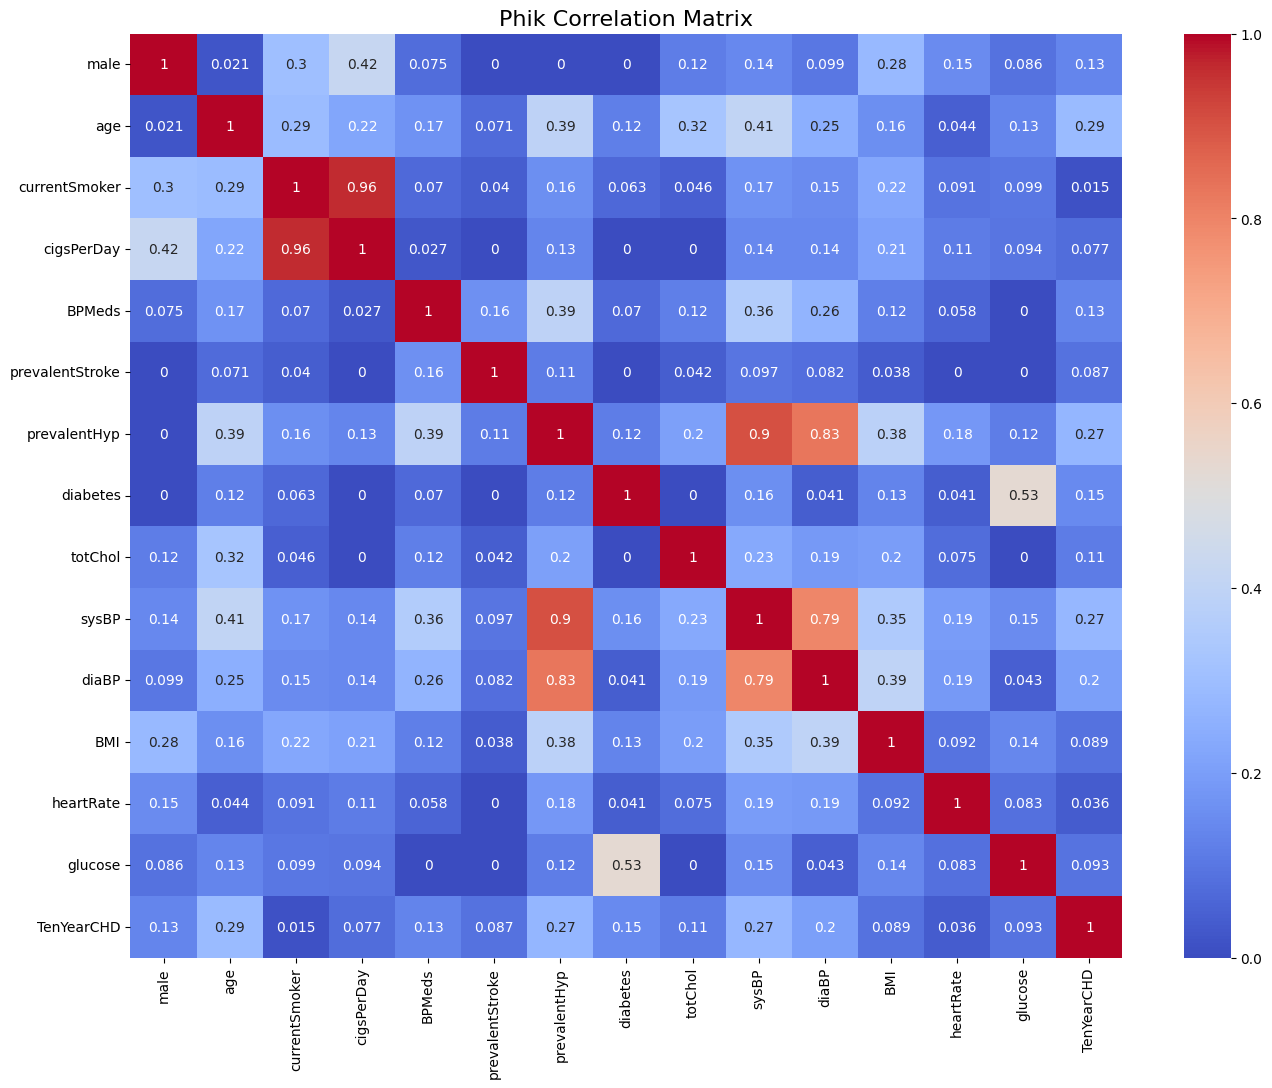

In [21]:
phik_corr = df.phik_matrix()

# Increase figure size BEFORE plotting
plt.figure(figsize=(16, 12))  # width=16 inches, height=12 inches

# Plot heatmap
sns.heatmap(phik_corr, cmap="coolwarm", annot=True)

# Optional title
plt.title("Phik Correlation Matrix", fontsize=16)
plt.show()

### Model Creation

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

numericalFeatures = X.select_dtypes(include='number').columns.tolist()
categoricalFeatures = X.select_dtypes(include='category').columns.tolist()

numericalTransformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categoricalTransformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numericalTransformer, numericalFeatures),
    ('cat', categoricalTransformer, categoricalFeatures)
])

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [24]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

model_weighted = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42))
])

model_weighted.fit(X_train, y_train)


smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model_smote = LogisticRegression(solver='liblinear', random_state=42)
model_smote.fit(X_train_smote, y_train_smote)

e:\projects\machine-learning\Logistic Regression\venv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


LogisticRegression(random_state=42, solver='liblinear')

### Evaluation

In [27]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

y_pred_weighted = model_weighted.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_weighted)
# Accuracy: Proportion of total correct predictions (both positives and negatives) out of all predictions.
# Good for balanced datasets but can be misleading if classes are imbalanced.

precision = precision_score(y_test, y_pred_weighted)
# Precision: Of all instances predicted as positive, the percentage that are actually positive.
# High precision means fewer false positives.

recall = recall_score(y_test, y_pred_weighted)
# Recall (Sensitivity): Of all actual positive instances, the percentage that are correctly identified.
# High recall means fewer false negatives — important in medical diagnosis.

f1 = f1_score(y_test, y_pred_weighted)
# F1 Score: Harmonic mean of precision and recall.
# Balances false positives and false negatives; useful when you want a single metric to assess model performance.

print("\nModel with class weights:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(classification_report(y_test, y_pred_weighted))

y_pred_smote = model_smote.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_smote)
# Accuracy: Proportion of total correct predictions (both positives and negatives) out of all predictions.
# Good for balanced datasets but can be misleading if classes are imbalanced.

precision = precision_score(y_test, y_pred_smote)
# Precision: Of all instances predicted as positive, the percentage that are actually positive.
# High precision means fewer false positives.

recall = recall_score(y_test, y_pred_smote)
# Recall (Sensitivity): Of all actual positive instances, the percentage that are correctly identified.
# High recall means fewer false negatives — important in medical diagnosis.

f1 = f1_score(y_test, y_pred_smote)
# F1 Score: Harmonic mean of precision and recall.
# Balances false positives and false negatives; useful when you want a single metric to assess model performance.

print("\nModel with SMOTE:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(classification_report(y_test, y_pred_smote))


Model with class weights:
Accuracy: 0.650
Precision: 0.258
Recall: 0.649
F1 Score: 0.369
              precision    recall  f1-score   support

           0       0.91      0.65      0.76       714
           1       0.26      0.65      0.37       134

    accuracy                           0.65       848
   macro avg       0.58      0.65      0.56       848
weighted avg       0.81      0.65      0.70       848


Model with SMOTE:
Accuracy: 0.638
Precision: 0.215
Recall: 0.485
F1 Score: 0.297
              precision    recall  f1-score   support

           0       0.87      0.67      0.76       714
           1       0.21      0.49      0.30       134

    accuracy                           0.64       848
   macro avg       0.54      0.58      0.53       848
weighted avg       0.77      0.64      0.68       848



In [26]:
print(y.value_counts(normalize=True))
# The target variable 'y' is imbalanced, as shown by the class proportions printed below.
# This means one class (usually the negative class) dominates the dataset,
# which can bias the model towards predicting the majority class.
# We observe this imbalance by running: print(y.value_counts(normalize=True))

TenYearCHD
0    0.848242
1    0.151758
Name: proportion, dtype: float64
